# Computer Vision - HW01
<font color='Green' size='4'>Mohammad Doosti Lakhani - 98722278</font>

This notebooks consists of:

1. Importing Libraries
2. Loading a Grayscale Image
3. Functions
4. Gaussian vs. Average
    1. Applying 5x5 Average Filter
    2. Applying 5x5 Gaussian Filter
    3. Compare Using RMSE
5. Gaussian vs. 2X Gaussian
    1. Applying 5x5 Gaussian Filter With `sigma1=1` *Twice*
    2. Applying a Gaussian Filter with Proper Size *Once*
    4. Compare Using RMSE

## 1 Importing Libraries

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

%matplotlib inline

## 2 Loading a Grayscale Image

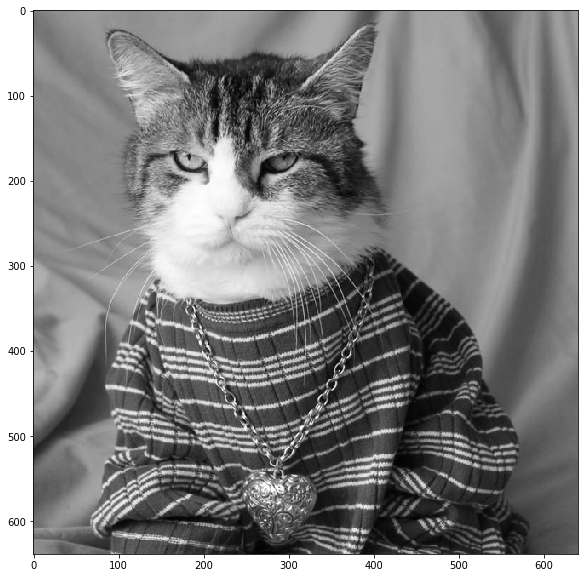

In [23]:
image = cv2.imread('images/cat.jpg', 0)
plt.figure(figsize=(15,10))
plt.imshow(image, cmap='gray')

## 3 Functions
Just a wrapper around built-in CV2 functions.

In [60]:
def gaussian(image, size, std):
    """
    Applies gaussian filter to smooth image
    
    :param image: Open cv or numpy ndarray image
    :param size: The size of gaussian filter
    :param std: if 0, it will be calculated automatically, otherwise for x and y sould be indicated.
    :return: An open cv image
    """
    return cv2.GaussianBlur(src=image, ksize=(size, size), sigmaX=std, sigmaY=std)

In [64]:
def average(image, size):
    """
    Applies average filter to smooth image
    
    :param image: Open cv or numpy ndarray image
    :param size: The size of average filter
    :return: An open cv image
    """
    
    kernel = np.ones((size, size), dtype=np.float32) / (size ** 2)
    return cv2.filter2D(src=image, ddepth=-1, kernel=kernel)

## 4. Gaussian vs. Average
1. Applying 5x5 Average Filter
2. Applying 5x5 Gaussian Filter
3. Compare Using RMSE

### 4.A Applying 5x5 Average Filter

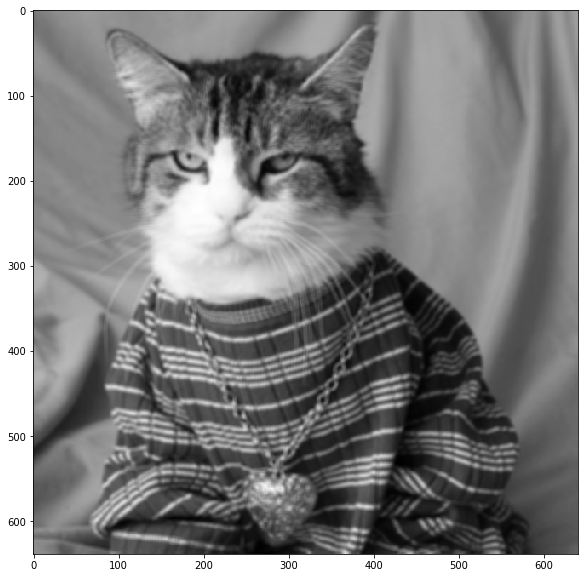

In [65]:
size = 5
average_blur = average(image, size)

plt.figure(figsize=(15,10))
plt.imshow(average_blur, cmap='gray')

### 4.B Applying 5x5 Gaussian Filter
In this step we just need to use the defined gaussian filter then using convolve2d function for doing this.

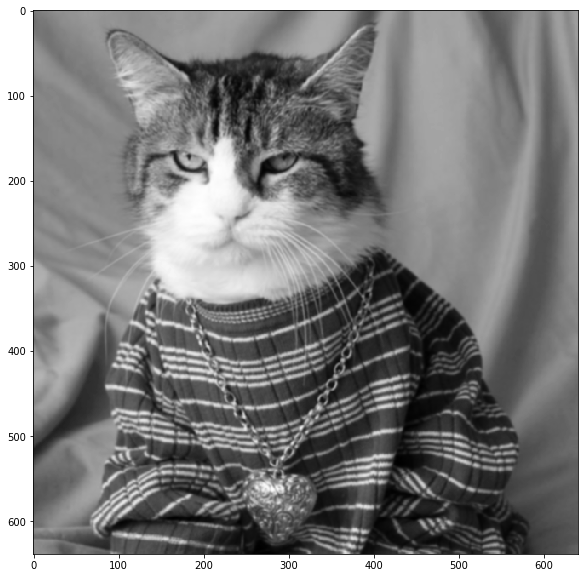

In [66]:
size = 5
std = 1
gaussian_blur = gaussian(image, size, std)

plt.figure(figsize=(15,10))
plt.imshow(gaussian_blur, cmap='gray')

### 4.C Compare Using RMSE
As images are same in term of size and content, RMSE can project the difference adequately.

In [67]:
def RMSE(x, y):
    """
    Calculates Root Mean Squared Error of two ndim matrices
    
    :param x: An ndim matrix
    :param y: An ndim matrix
    :return: A float number
    """
    
    return np.sqrt(np.sum((x - y) ** 2) / (x.shape[0] * x.shape[1]))

In [68]:
print('RMSE between an image smoothed using a 5x5 average filter and original image: \n', RMSE(average_blur, image))
print('RMSE between an image smoothed using a 5x5 gaussian filter with std=1 and original image: \n', RMSE(gaussian_blur, image))
print('RMSE between an image smoothed using a 5x5 gaussian filter with std=1 and a a 5x5 average filter: \n', RMSE(gaussian_blur, average_blur))

RMSE between an image smoothed using a 5x5 average filter and original image: 
 6.05276825272
RMSE between an image smoothed using a 5x5 gaussian filter with std=1 and original image: 
 5.25244116618
RMSE between an image smoothed using a 5x5 gaussian filter with std=1 and a a 5x5 average filter: 
 4.46572404171


## 5 Gaussian vs. 2X Gaussian
1. Applying 5x5 Gaussian Filter With `sigma1=1` *Twice*
2. Applying a Gaussian Filter with Proper Size and `sigma2=sqrt(2)` *Once*
4. Compare Using RMSE

### 5.A Applying 5x5 Gaussian Filter With `sigma1=1` Twice
This is same as previous step, the only difference is that we apply gaussian twice subsequently.

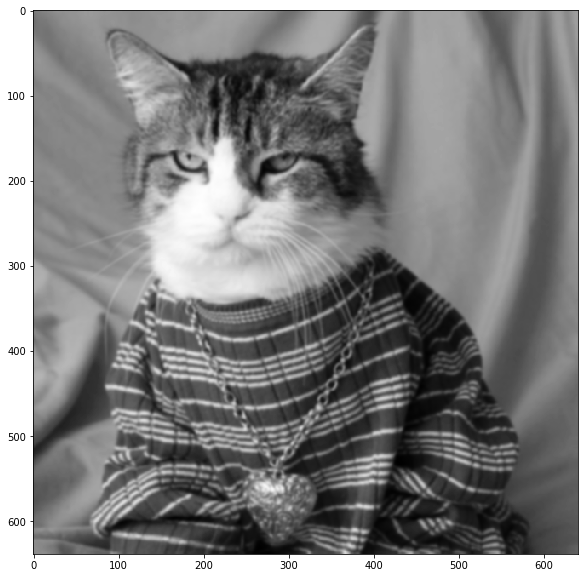

In [69]:
size = 5
std = 1
gaussian_blur_twice = gaussian(image, size, std)
gaussian_blur_twice = gaussian(gaussian_blur_twice, size, std)

plt.figure(figsize=(15,10))
plt.imshow(gaussian_blur_twice, cmap='gray')

### 5.B Applying a Gaussian Filter with Proper Size and `sigma2=sqrt(2)` *Once*
To get the proper size, there is rule of thump that says the filter size should be biggest odd number which is less than 6 times of sigma.
In our case as sigma is sqrt(2), 6xSigma = 8 and the biggest odd number less than 8 is 7. So kernel size will be 7.

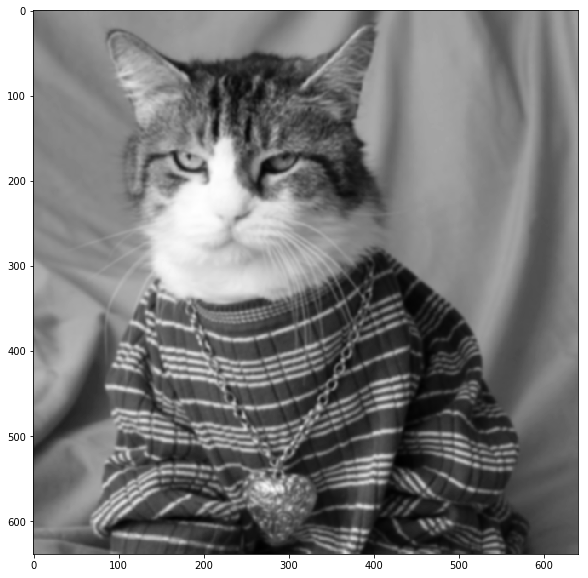

In [70]:
size = 7
std = np.sqrt(2)
gaussian_blur = gaussian(image, size, std)

plt.figure(figsize=(15,10))
plt.imshow(gaussian_blur, cmap='gray')

### 5.C Compare Using RMSE
As images are same in term of size and content, RMSE can project the difference adequately.

In [71]:
print('RMSE between an image smoothed TWICE using a 5x5 gaussian filter with std=1 and original image: \n',
      RMSE(gaussian_blur_twice, image))
print('RMSE between an image smoothed ONCE using a 7x7 gaussian filter with std=sqrt(2) and original image: \n',
      RMSE(gaussian_blur, image))
print('RMSE between an image smoothed TWICE using a 5x5 gaussian filter with std=1 and ONCE using a 7x7 gaussian filter with std=sqrt(2): \n',
      RMSE(gaussian_blur, gaussian_blur_twice))

RMSE between an image smoothed TWICE using a 5x5 gaussian filter with std=1 and original image: 
 5.84284289425
RMSE between an image smoothed ONCE using a 7x7 gaussian filter with std=sqrt(2) and original image: 
 5.8536208248
RMSE between an image smoothed TWICE using a 5x5 gaussian filter with std=1 and ONCE using a 7x7 gaussian filter with std=sqrt(2): 
 0.297867518681


As we can see the last number which demonstrates the discrepancy between blured image using 7x7 gaussian once and 5x5 gaussian twice is very small which is a depiction for high similarity between the outputs. So the idea of using multiple gaussians filter subsequently can be achieved using a higher (bigger size) gaussian is approximately true.